In [ ]:
!pip install better_profanity
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')



RAW_INPUT_TRAINING_DATA = "dataset_combined_2510_new.csv"



USER_TWEET_DATA_FILE = "user_tweets.csv"
PREPROCESSED_INPUT_TRAINING_DATA = "preprocessed_input_data.csv"
MODEL_FILE = "model.pkl"
VECTORIZER_FILE = "vectorizer.pkl"



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.1/46.1 kB 1.7 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:

#DATA CLEANING: Vectorizer AND NLP

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import re
from sklearn.feature_extraction.text import TfidfVectorizer

#importing nlp packages
from nltk import stem
from nltk.corpus import stopwords
stemmer = stem.SnowballStemmer('english')
stopwords = set(stopwords.words('english'))


#removing the special characters and numbers and url
def keep_alpha(s):
#     s = row['content']
    non_url = re.sub(r"http\S+", "", s)
    res = re.sub('[^a-zA-Z\s]', '', non_url)
    res1 = re.sub('\n', '', res)
    return res1

def nlp_preprocessing(msg):
    try:
        # converting messages to lowercase
        msg = msg.lower()
        # removing stopwords
        msg = [word for word in msg.split() if word not in stopwords]
        # using a stemmer (getting root form of each word of each row)
        msg = " ".join([stemmer.stem(word) for word in msg])

    except Exception as e:
        print(e)

    return msg


df=pd.read_csv(RAW_INPUT_TRAINING_DATA)
df.rename(columns = {'Text':'tweet'}, inplace = True)
df = df.dropna()
df = df.sample(frac=1).reset_index()
#df = df.sample(frac=0.1).reset_index()


# data preprocessing using NLP : nltk
df['tweet'] = df['tweet'].astype(str)
#remove leading and ending whitespaces
df['tweet'] = df['tweet'].str.strip()

# keep only alphabets
df['tweet'] = df['tweet'].apply(keep_alpha)

# nlp preprocessing to remove stopwords and get base/stem form of each word
df['tweet'] = df['tweet'].apply(nlp_preprocessing)
print(df.head(2))
print(df.tail(2))


print(df['depressed'].value_counts())

# df.to_csv("data//preprocessed_input_data.csv", index=False)
df.to_csv(PREPROCESSED_INPUT_TRAINING_DATA, index=False)




   index                                              tweet depressed
0  20451  liter depress upcom drought sudden got airport...       YES
1   8748  oh great radio disney doesnt crash latest webk...        NO
       index                        tweet depressed
37865  10095  dont feel good sick stomach        NO
37866  18590            depress fine fuck       YES
depressed
YES    23012
NO     14855
Name: count, dtype: int64


   index                                              tweet depressed
0  12508  misslaura aww internet yeah say want applaus e...        NO
1  35484  copypast status your read need somebodi talk i...       YES
2  33757                                  feel depress area       YES
3  22024                                       epic uwu ili       YES
4   2768  rt nctymisfit happi birthday yuta likeabutterf...        NO


----SVM------
Confusion matrix SVM:
 [[2666  301]
 [ 308 4088]]


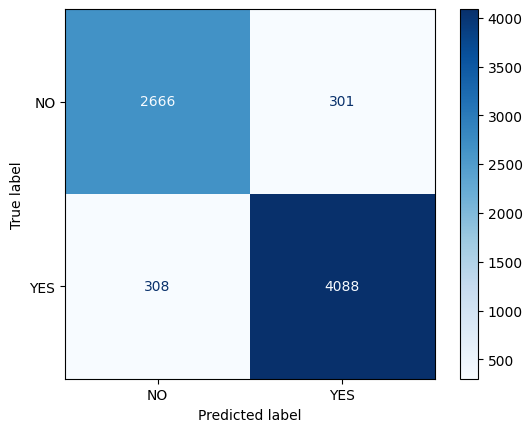

Accuracy score for SVM:  91.73


-----------Logistic Regression-----
Confusion matrix Logistic Regression:
 [[2625  342]
 [ 331 4065]]


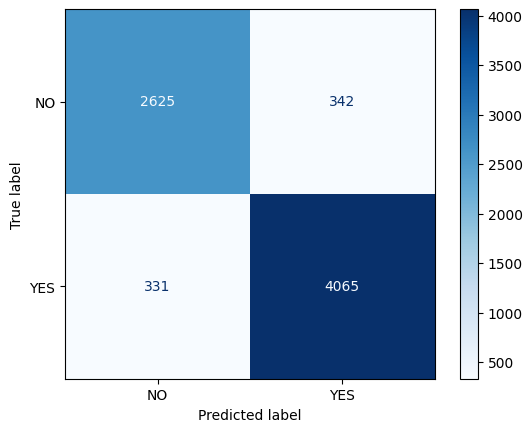

Accuracy score for Logistic regression:  90.86


--------Decision Tree------------
Confusion matrix Decision Tree:
 [[2587  380]
 [ 441 3955]]


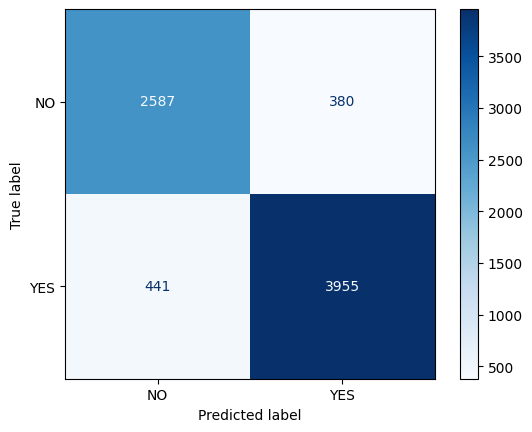

Accuracy score for  Decision Tree:  88.85





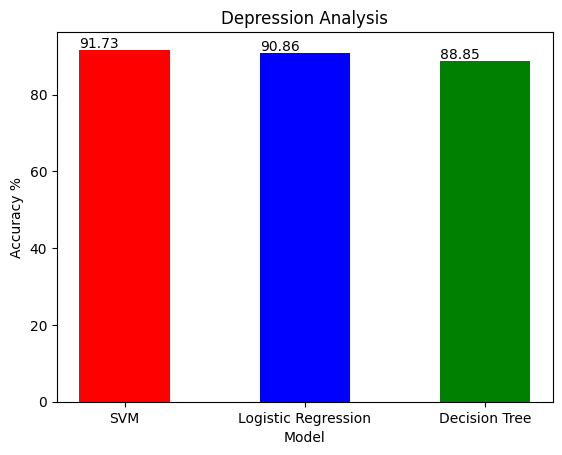

<Figure size 1500x1500 with 0 Axes>






----SVM------
Confusion matrix SVM:
 [[2666  301]
 [ 308 4088]]


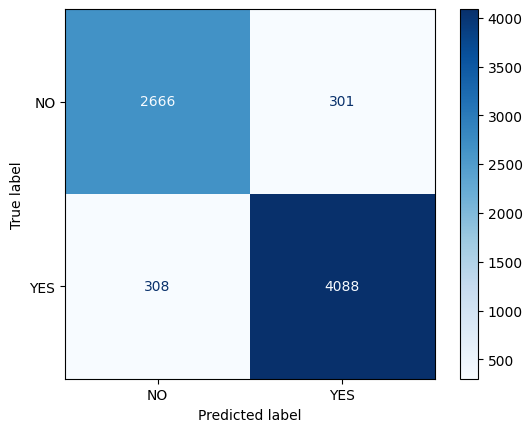

Accuracy score for SVM:  91.73


 Model accuracy:  91.73


 [[2666  301]
 [ 308 4088]]


In [ ]:


import pandas as pd
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score


# to save or to load model
import joblib

svmout=0
lrout=0
dtout=0

## SVM
def train_svm(X_train, X_test, y_train, y_test):

    from sklearn import svm
    svm = svm.SVC(C=1000)

    # training svm model
    svm.fit(X_train, y_train)

    print("\n\n----SVM------")
    y_pred = svm.predict(X_test)
    print("Confusion matrix SVM:\n", confusion_matrix(y_test, y_pred))

    disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=np.unique(y_train))
    disp.plot(cmap="Blues")
    plt.show()

    plt.show()

    svmout=round((accuracy_score(y_test, y_pred) * 100),2)
    # calculate the accuracy
    print("Accuracy score for SVM: ", round((accuracy_score(y_test, y_pred) * 100),2))

    return svm, svmout



## Logistic regression
def train_logistic_regression(X_train, X_test, y_train, y_test):
    from sklearn.linear_model import LogisticRegression
    # Create an instance of the model.
    logreg = LogisticRegression()
    # Training the model.
    logreg.fit(X_train,y_train)

    #Do prediction.
    y_pred=logreg.predict(X_test)

    print("\n\n-----------Logistic Regression-----")
    print("Confusion matrix Logistic Regression:\n",confusion_matrix(y_test, y_pred))

    disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=logreg.classes_)
    disp.plot(cmap="Blues")
    plt.show()

    lrout=round((accuracy_score(y_test, y_pred) * 100),2)
    # calculate the accuracy
    print("Accuracy score for Logistic regression: ", round((accuracy_score(y_test, y_pred) * 100),2))
    return logreg, lrout



## Decision Tree
def train_decision_tree(X_train, X_test, y_train, y_test):
    from sklearn.tree import DecisionTreeClassifier
    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)


    y_pred = model.predict(X_test)
    print("\n\n--------Decision Tree------------")
    print("Confusion matrix Decision Tree:\n",confusion_matrix(y_test, y_pred))

    disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=model.classes_)
    disp.plot(cmap="Blues")
    plt.show()

    dtout= round((accuracy_score(y_test, y_pred) * 100),2)
    print("Accuracy score for  Decision Tree: ", round((accuracy_score(y_test, y_pred) * 100),2))
    return model, dtout





# training ML Model
# df = pd.read_csv("data//preprocessed_input_data.csv")
df = pd.read_csv(PREPROCESSED_INPUT_TRAINING_DATA)
df = df.dropna()
print(df.head())

# training the vectorizer (conveet text data to number data)
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['tweet'].values )
y = df['depressed'].values

#save vectorizer object to vectorize user tweets later
# joblib.dump(vectorizer, 'vectorizer.pkl')
joblib.dump(vectorizer, VECTORIZER_FILE)


# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)



# checking accruacy of SVM
svm_model, svmout = train_svm(X_train, X_test, y_train, y_test)

# checking accuracy of Logistic Regression
lr_model, lrout = train_logistic_regression(X_train, X_test, y_train, y_test)

# checking accuracy of Decision Tree Algorithm
dt_model, dtout = train_decision_tree(X_train, X_test, y_train, y_test)



#PLOTING

# data = {'SVM':svmout, 'Logistic Regression':lrout, 'Decision Tree':dtout}
# courses = list(data.keys())
# values = list(data.values())

# fig = plt.figure(figsize = (10, 5))
# # creating the bar plot
# plt.bar(courses, values, color ='maroon',
# 		width = 0.4)
# plt.xlabel("Tweet")
# plt.ylabel("No. of tweets")
# plt.title("Depression Analysis")
# plt.show()

x = ['SVM', 'Logistic Regression', 'Decision Tree']
y = [svmout, lrout, dtout]
color = ['red', 'blue', 'green']
bars = plt.bar(x, height=y, color=color, width=.5)
xlocs, xlabs = plt.xticks()
# reference x so you don't need to change the range each time x changes
xlocs=[i for i in x]
xlabs=[i for i in x]
plt.xlabel('Model')
plt.ylabel('Accuracy %')
plt.xticks(xlocs, xlabs)
plt.title("Depression Analysis")

print("\n\n")
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .5, yval)

plt.figure(figsize=(15, 15))
plt.show()

print("\n\n")


#  choose SVM Regression based on high accuracy score
model, accuracy_final = train_svm(X_train, X_test, y_train, y_test)


# Save the model as a pickle in a file at given location "model.pkl"
#joblib.dump(model, 'model.pkl')
joblib.dump(model, MODEL_FILE)


# Load/Read the model from the file at given location "model.pkl"
# classification_model = joblib.load('model.pkl')
classification_model = joblib.load(MODEL_FILE)

# predicting the model on test data
y_pred=classification_model.predict(X_test)

# calculate the accuracy
print("\n\n Model accuracy: ", round((accuracy_score(y_test, y_pred) * 100), 2))

print("\n\n", confusion_matrix(y_test, y_pred))





In [ ]:
import re
import numpy as np
import tweepy
import pandas as pd
import joblib

# Define your API credentials
api_key = 'L9370txs0JmYXqPhRmcrnajfI'
api_key_secret = '2VJVJLw8dVF5XoCeuz5IAbDFh9vXPRD4PuwrnlpnDloioDHfFL'
access_token = '1855841905520558080-t9XlTAbY0Pg4yZf9P13CDnggQPnc8d'
access_token_secret = 'yalElj2KmNerechZ2qKeOXryE7IdP1wx9aPvW6bk7ZO1D'

# Define the file paths for saving and loading
USER_TWEET_DATA_FILE = 'user_tweets.csv'
VECTORIZER_FILE = 'vectorizer.pkl'
MODEL_FILE = 'model.pkl'

# Helper functions
def keep_alpha(text):
    return re.sub(r'[^a-zA-Z\s]', '', text)

def nlp_preprocessing(text):
    # Custom NLP preprocessing logic; define as needed
    return text.lower()

def download_user_tweets():
    # Set up tweepy with OAuth1.0a
    auth = tweepy.OAuthHandler(api_key, api_key_secret)
    auth.set_access_token(access_token, access_token_secret)
    api = tweepy.API(auth, wait_on_rate_limit=True)

    # Get the username and limit the number of tweets
    user = input("Enter Twitter username: ").strip()
    if len(user) <= 1:
        user = 'elonmusk'
    limit = 10

    try:
        # Fetch recent tweets from the specified user (limited to your account permissions)
        tweets = tweepy.Cursor(api.user_timeline, screen_name=user, count=200, tweet_mode='extended').items(limit)

        # Create DataFrame
        columns = ['User', 'tweet']
        data = [[tweet.user.screen_name, tweet.full_text] for tweet in tweets]
        df = pd.DataFrame(data, columns=columns)

        # Save tweets to CSV
        df.to_csv(USER_TWEET_DATA_FILE, index=False)
        return df

    except tweepy.errors.Forbidden:
        print("Access to user timeline is restricted. You may need a higher access level.")
        return pd.DataFrame(columns=['User', 'tweet'])

def predict_user_tweets(df):
    # Preprocess tweets
    df['tweet'] = df['tweet'].astype(str).str.strip()
    df['tweet'] = df['tweet'].apply(keep_alpha).apply(nlp_preprocessing)
    df['tweet'].replace('', np.nan, inplace=True)
    df = df.dropna().reset_index(drop=True)

    # Load vectorizer and transform tweets
    vectorizer = joblib.load(VECTORIZER_FILE)
    X_test = vectorizer.transform(df['tweet'].values)

    # Load model and predict
    classification_model = joblib.load(MODEL_FILE)
    y_pred = classification_model.predict(X_test)

    # Store predictions
    df['prediction'] = y_pred
    print(df[['tweet', 'prediction']])
    return list(y_pred)

def final_output(predictions):
    total = len(predictions)
    depressed_count = predictions.count("YES")
    print("\nResult: DEPRESSED 😒" if depressed_count > total * 0.6 else "\nResult: NOT DEPRESSED 😊")

# Run the process
user_tweets = download_user_tweets()
if not user_tweets.empty:
    predictions = predict_user_tweets(user_tweets)
    final_output(predictions)
else:
    print("No tweets found or access restricted for the specified user.")

Enter Twitter username: imVkohli
Access to user timeline is restricted. You may need a higher access level.
No tweets found or access restricted for the specified user.
